[Oregon Curriculum Network](http://4dsolutions.net/ocn/)

[School of Tomorrw (Home)](School_of_Tomorrow.ipynb)



<a data-flickr-embed="true"  href="https://www.flickr.com/photos/kirbyurner/20946665614/" title="DSCF0447"><img src="https://live.staticflickr.com/571/20946665614_6bc416e5a4.jpg" width="500" height="375" alt="DSCF0447"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

# Calculator Sandbox

Continued from [Calculator of Tomorrow](arithmetic.ipynb)...

## Plotting Curves

In the old days, we used graphing calculators for some of this, and paper and pencil before that.


![plot](parabola.png)

Those older tools still make sense to use in some contexts, but when you're going for some publication quality digital outputs, you'll want to do more homework.

One way to build skills with these new tools is to revisit high schoolish content (dig up some old textbooks), perhaps already covered with a graphing calculator.  

You were taught to plot some y versus some x.  

You were told x would be "time" sometimes, not other times.

![plot](3rd_powering.png)

Then came the linear and parabolic equations, and their respective curves.  Even straight lines might be considered curves, the ones we don't see bending in the scope of our viewframe.

---

Lets do some review from the top, now that we've toured a large territory.

Given this is a visualization course, lets talk about plotting right away.

Classic opening, like pawn to King-4 in chess.  We'll get the Queen out later (pandas).

#### By the Way... Lets Talk about Unicode!

# &#128120; &#9812; &#128060;

[StackOverFlow discussion](https://stackoverflow.com/questions/34538879/unicode-in-github-markdown)

This way of representing Unicode characters in Markdown requires knowing the decimal equivalents.

🐼🐼🐼🐼🐼🐼🐼

Once you get the glyph you want, rendered, just cut and paste it back in.  

Now that you've conjured the panda, the panda is yours.

And now, for our opening moves...

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')  # <--- good idea, looks nicer
import numpy as np

In the beginning, one needs a "domain" to rule over, a turf.  We'll be using numpy to generate domains a lot, especially...

In [2]:
np.round(np.linspace(-1, 1, 11), 2) # say how many points

array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ])

In [3]:
np.round(np.arange(-1, 1.1, 0.2), 2) # give spread between the points

array([-1. , -0.8, -0.6, -0.4, -0.2, -0. ,  0.2,  0.4,  0.6,  0.8,  1. ])

Here's a Castle, an Emoji.  Do you see it?

# &#127984;

Our ability to reach a "co-domain" another turf, depends on having some domain to feed to a callable.  The callable eats domain objects (picture fish) and does whatever work necessary to reach a corresponding result.

In [4]:
chr(127984)  # testing the chr function, see a Castle?

'🏰'

What can they teach me about parabolas in Cyberia?  Do we find them in nature?

* [Real Life Examples](https://sciencestruck.com/real-life-examples-of-parabola)
* [Lots in Gravity and Area Optimizing Problems](https://www.mathsisfun.com/algebra/quadratic-equation-real-world.html)

 ### TIME TO GET PLOTTING!
 
A question to ask yourself, when invoking such "spells" as ```plt.plot``` or ```plt.figure``` is what do they return?  

You won't necessarily need to give it a name, but it still helps to keep return types in mind.  We start learning that in the C language, one of Python's several precursors.

[Docs on pyplot.plot](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.plot.html)

```
plot([x], y, [fmt], *, data=None, **kwargs)
plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
```

```
>>> plot('xlabel', 'ylabel', data=obj)  # for when we get to pandas
```

[Docs on pyplot.figure](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.figure.html)
```
pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)[source]
```

In [5]:
from functools import partial

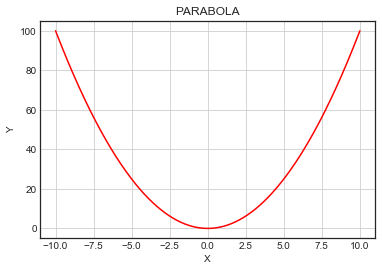

In [6]:
domain = np.linspace(-10, 10, 1000)  # a thousand points, evenly spaced
parabola = lambda x, c, d: c*x*x + d

parabola1_f = partial(parabola, c=1, d=0)
parabola1_y = parabola1_f(domain)

figures = []
figures.append(plt.figure(num='2nd_powering'))  # not "squaring" necessarily

plt.plot(domain, parabola1_y, 'r')
plt.xlabel('X')
plt.ylabel('Y')
plt.title("PARABOLA");
plt.grid(True);

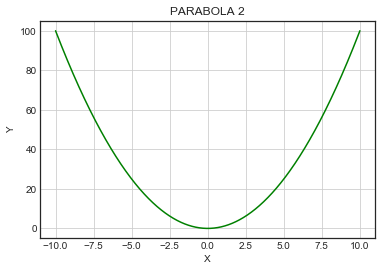

In [7]:
figures.append(plt.figure(num='PARABOLA2'))  # not "squaring" necessarily

parabola2_f = partial(parabola, c=-1, d=100)
parabola2_y = parabola1_f(domain)

plt.plot(domain, parabola2_y, 'g')
plt.xlabel('X')
plt.ylabel('Y')
plt.title("PARABOLA 2");
plt.grid(True);

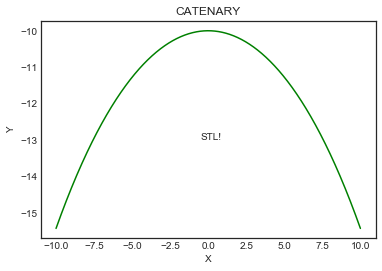

In [8]:
figures.append(plt.figure(num='CATENARY')) 
catenary = lambda x, a: a*np.cosh(x/a)

catenary1_f = partial(catenary, a=-10)
catenary1_y = catenary1_f(domain)

plt.plot(domain, catenary1_y, 'g')
plt.xlabel('X')
plt.ylabel('Y')
plt.title("CATENARY");
plt.annotate("STL!", (-0.5,-13))
plt.grid(False);

Do you see a catenary in the picture below?

<a data-flickr-embed="true"  href="https://www.flickr.com/photos/kirbyurner/26565791380/in/photostream/" title="St. Louis Arch"><img src="https://live.staticflickr.com/7207/26565791380_7c49625997.jpg" width="375" height="500" alt="St. Louis Arch"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

Look at how ```lambda``` was used to express a rule.  

The object thereby created is a callable object, and we named it for later use.  

[![Socratica](http://img.youtube.com/vi/25ovCm9jKfA/0.jpg)](http://www.youtube.com/watch?v=25ovCm9jKfA "Lambda Expressions")


If you had wanted to show everything in some step...

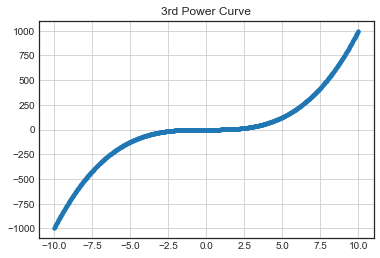

In [9]:
figures.append(plt.figure(num='3rd_powering'))              # not "cubing" necessarily
plt.plot(domain, (lambda x: x**3)(domain), '.') # thicken with markers
plt.grid(True)
plt.title("3rd Power Curve");

Hey these are pretty graphics that we might want to stick in other homework, to prove we've been busy.  How do we keep the above figures as png files, for example?

```
savefig(fname, dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)
```


In [10]:
for figure in figures:
    figure.savefig('{0}.png'.format(figure.get_label()))

Remember what it means to ```np.vectorize```?  We're making a "callable" (technical term) work with a numpy ndarray (an n-dimensional array) such that it applies to all elements in that array.

lets move on to pandas and look at functions in terms of columns, x and y.

# 🐼🐼🐼🐼🐼🐼🐼🐼

In [11]:
import pandas as pd

In [12]:
parabola = pd.DataFrame({'x': domain,
                         'y': (lambda x: x**2)(domain)})
parabola.index.name = 'samples'

In [13]:
parabola.head()

,x,y
samples,,
0,-10.00000,100.000000
1,-9.97998,99.600000
2,-9.95996,99.200802
3,-9.93994,98.802406
4,-9.91992,98.404811


OMG that was easy.  Might we do plotting directly from a DataFrame.  

That might be too good to be true.

[Yes We Can!](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)

Yet we're still free to modify and decorate the final result, having taken advantage of some streamlining.

For example, we might ["annotate"](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.annotate.html), meaning add strings to the plot in curious ways.

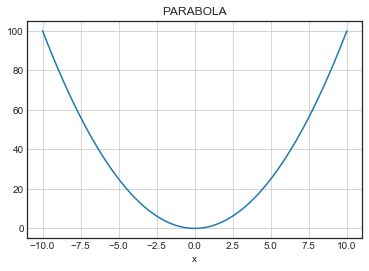

In [14]:
fig, ax = plt.subplots()
parabola.plot(x='x', y='y', 
              kind='line', 
              title="PARABOLA", 
              grid=True, legend=False, ax=ax);

In [15]:
fig.savefig('new_parabola.png')

In [16]:
two_curves = pd.DataFrame({'x': domain,
                           'curve0': np.vectorize(lambda x: x**2)(domain),
                           'curve1': np.vectorize(lambda x: x**3)(domain)})

In [17]:
two_curves.head()

,x,curve0,curve1
0,-10.00000,100.000000,-1000.000000
1,-9.97998,99.600000,-994.006010
2,-9.95996,99.200802,-988.036020
3,-9.93994,98.802406,-982.089982
4,-9.91992,98.404811,-976.167847


We'll not use subplots at first.  Lets get both curves on the same grid.  If you don't turn subplots on, this will be the default behavior.  If you do turn subplots on, specify layout too, so that you get what you know you want.  See below.

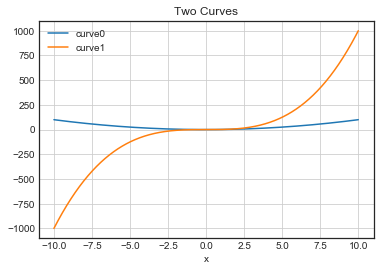

In [18]:
two_curves.plot(x='x', y=['curve0', 'curve1'], 
                grid=True, title="Two Curves");

OK, now we're starting to get fancy.  The ```DataFrame.plot``` method will let you turn on subplots, specify their layout, and then access the subplots individually, by means of axes.

Note how layout=(2,1) says "give me two rows in a single column", and don't draw the x tickmarks both times, let them share.  The returned object is a numpy array of axes, organized the same way (in the same shape) as the subplots.

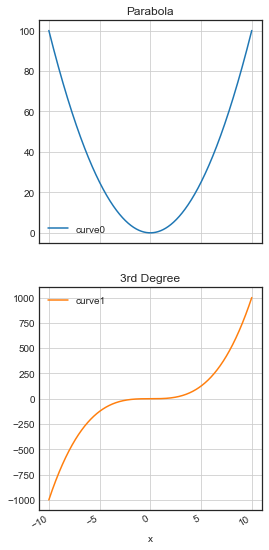

In [19]:
axes = two_curves.plot(x='x', y=['curve0', 'curve1'], layout=(2,1), 
                sharex=True, subplots=True, figsize=(4,10), grid=True)

axes[0,0].set_title('Parabola')
axes[1,0].set_title('3rd Degree');

* [A Guide to Subplots (VanderPlas)](https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html)
* [Direct from the Docs](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html)

#### Different Workout

Lets essentially duplicate the work we just did, but without the benefit of the DataFrame's plot method.  We will call on plt subplots directly.

```
matplotlib.pyplot.subplots(nrows=1, ncols=1, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)[source]
```

[Programmatically selecting subplots (StackOverFlow)](https://stackoverflow.com/questions/7101273/how-can-i-programmatically-select-a-specific-subplot-in-matplotlib)

My recommendation:  use the ```pandas.plot``` facility, or the ```plt.subplots``` facility for pretty much all your plotting needs.

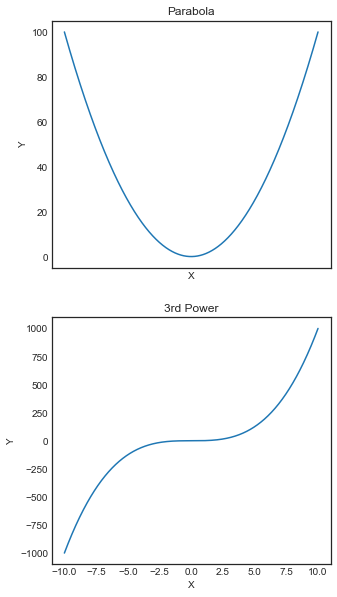

In [20]:
import matplotlib.pyplot as plt

fig, the_axes = plt.subplots(ncols=1, nrows=2, sharex=True, figsize=(5,10))
ax0, ax1 = the_axes  # top row, only column
#======= axis0 =========
ax0.plot('x', 'curve0', data=two_curves)
ax0.set_title("Parabola")
ax0.set_xlabel("X")
ax0.set_ylabel("Y")
#======= axis1 =========
ax1.plot('x', 'curve1', data=two_curves)
ax1.set_title("3rd Power")
ax1.set_xlabel("X")
ax1.set_ylabel("Y");

### What Other Curves Might We Explore?

In [21]:
three_curves = pd.merge(two_curves, 
                        pd.DataFrame({"curve2": np.exp(domain)}), 
                        right_index=True, left_index=True)

In [22]:
three_curves.head()

,x,curve0,curve1,curve2
0,-10.00000,100.000000,-1000.000000,0.000045
1,-9.97998,99.600000,-994.006010,0.000046
2,-9.95996,99.200802,-988.036020,0.000047
3,-9.93994,98.802406,-982.089982,0.000048
4,-9.91992,98.404811,-976.167847,0.000049


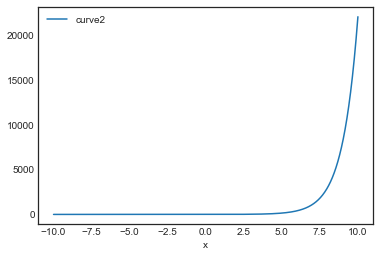

In [23]:
three_curves.plot(x='x', y='curve2');

In [24]:
μ = 0      # lets use Greek letters
σ = 1      # standard deviation
π = np.pi

rule = lambda x: (1/(σ * np.sqrt(2 * π))) * np.exp(-0.5 * ((μ - x)/σ)**2)

In [25]:
four_curves = pd.merge(three_curves, pd.DataFrame({"curve3": np.vectorize(rule)(domain)}), 
                                                  right_index=True, left_index=True)

In [26]:
four_curves.head()

,x,curve0,curve1,curve2,curve3
0,-10.00000,100.000000,-1000.000000,0.000045,7.694599e-23
1,-9.97998,99.600000,-994.006010,0.000046,9.398202e-23
2,-9.95996,99.200802,-988.036020,0.000047,1.147439e-22
3,-9.93994,98.802406,-982.089982,0.000048,1.400362e-22
4,-9.91992,98.404811,-976.167847,0.000049,1.708350e-22


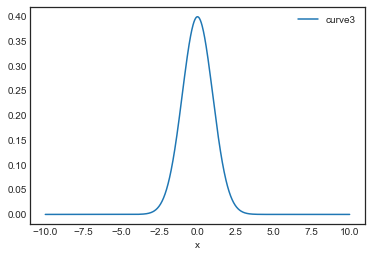

In [27]:
four_curves.plot(x='x', y='curve3');

In [28]:
four_curves.to_csv("curvy_data.csv")

### PASCAL'S TRIANGLE

The Bell Curve above looks a lot like the Binomial Distribution, which we tend to see in a Galton Board.  Lets define a generator that gives successive rows of Pascal's Triangle, and do a bar plot of the result.

In [29]:
def pascal():
    """
    Successive rows of Pascal's Triangle
    """
    row = np.array([1], dtype='int64')
    while True:
        yield row
        reg0 = np.append(row, np.zeros(1, dtype='int64'))
        reg1 = np.append(np.zeros(1, dtype='int64'), row)
        row = reg0 + reg1
        
gen = pascal()

for _ in range(10):
    print(next(gen))

[1]
[1 1]
[1 2 1]
[1 3 3 1]
[1 4 6 4 1]
[ 1  5 10 10  5  1]
[ 1  6 15 20 15  6  1]
[ 1  7 21 35 35 21  7  1]
[ 1  8 28 56 70 56 28  8  1]
[  1   9  36  84 126 126  84  36   9   1]


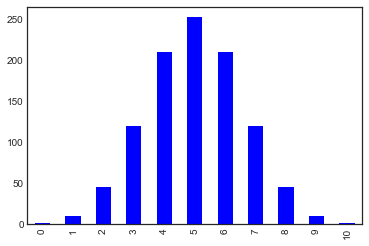

In [30]:
fig, axes = plt.subplots(0,0)
data = next(gen)
pd.Series(data).plot(kind='bar', color='b');

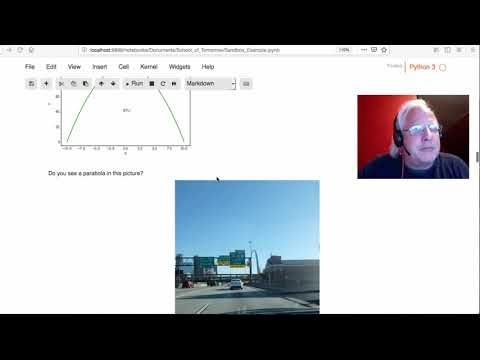

In [31]:
from IPython.display import YouTubeVideo
YouTubeVideo("TQwHw61kEN4")  # https://youtu.be/TQwHw61kEN4

<a data-flickr-embed="true"  href="https://www.flickr.com/photos/kirbyurner/21569447165/in/dateposted-public/" title="DSCF0441"><img src="https://live.staticflickr.com/5816/21569447165_0434328420.jpg" width="500" height="375" alt="DSCF0441"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>